In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten , Conv2D, MaxPooling2D, BatchNormalization
tf.__version__

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split , cross_val_predict , cross_val_score

from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau,ModelCheckpoint

from tqdm import tqdm
import os
import cv2
import datetime
import time
import math
import random
check_gpu = len(tf.config.list_physical_devices('GPU'))>0

print("GPU is", "available" if check_gpu \
      else "NOT AVAILABLE")

GPU is available


In [ ]:
!nvidia-smi
tf.test.gpu_device_name()

Sat May 15 14:50:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    30W / 149W |      3MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

'/device:GPU:0'

#Load Data

In [ ]:
 FOLDER = "/content/drive/MyDrive/Dataset/Leavesv2"
 KATEGORI = ['Black spot' , 'canker' ,'greening', 'healthy']
 size = 128

 all_data = []

In [ ]:
def ambil_all_data():
  for kategori in sorted(KATEGORI):
    path = os.path.join(FOLDER , kategori)
    nomor_kelas = KATEGORI.index(kategori)
    for lihat in tqdm(sorted(os.listdir(path))):
      try:
        img_array = cv2.imread(os.path.join(path,lihat))
        RGBimg = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        lihat = cv2.resize(RGBimg, (size, size))
        all_data.append([lihat, nomor_kelas])
      except Exception as eror:
        print(eror)


In [ ]:
ambil_all_data()
print("\n Total Data :", len(all_data))

100%|██████████| 150/150 [01:20<00:00,  1.86it/s]


 Total Data : 600


In [ ]:
x = []
y = []

for fitur , label in all_data:
  x.append(fitur)
  y.append(label)

x = np.array(x).reshape(-1, size , size , 3)
y = np.array(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,

#Input Training and Augmentation Data

In [ ]:
x_train , x_test, y_train, y_test = train_test_split(x, y, stratify = y, train_size = 0.8)

x_train = x_train/255.0
x_test = x_test/255.0

img_train , img_test , lab_train , lab_test  = train_test_split(x_train, y_train, train_size = 0.8)

print('Citra Latih X :', x_train.shape)
print('Label Latih Y :', np.array(y_train).shape)
print('========================================')
print('Citra Uji X :', x_test.shape)
print('Label Uji Y :', np.array(y_test).shape)
print('========================================')
print('Citra Latih X :', img_train.shape)
print('Label Latih Y :', np.array(lab_train).shape)
print('========================================')
print('Citra Latih X :', img_test.shape)
print('Label Latih Y :', np.array(lab_test).shape)
print('========================================')


Citra Latih X : (480, 128, 128, 3)
Label Latih Y : (480,)
Citra Uji X : (120, 128, 128, 3)
Label Uji Y : (120,)
Citra Latih X : (384, 128, 128, 3)
Label Latih Y : (384,)
Citra Latih X : (96, 128, 128, 3)
Label Latih Y : (96,)


In [ ]:
len(x_test)

120

In [ ]:
 input_train = img_train
 target_train = lab_train 
 input_test = img_test
 target_test = lab_test

 inputshape = x.shape[1:]

 #parse numbers as floats
 input_train = input_train.astype('float32')
 input_test = input_test.astype('float32')

 #merge inputs and targets
 inputs = np.concatenate((input_train, input_test), axis = 0)
 targets = np.concatenate((target_train,target_test), axis=0)

 #model conf
 batch_size = 32
 loss_function = sparse_categorical_crossentropy
 no_classes = 4
 no_epoch = 10
 optimizer = Adam()
 validation_split = 0.2
 verbosity = 0

#  print('Citra Latih : ', inputs.shape)
print('citra latih', inputs.shape)
 print('label uji : ', np.array(targets).shape)

citra latih (480, 128, 128, 3)
label uji :  (480,)


In [ ]:
datagen = ImageDataGenerator(
                      rotation_range=15,
                      shear_range=0.1,
                      zoom_range = 0.2,
                      horizontal_flip=True,
                      vertical_flip=True
                      )
train_generator = datagen.flow(x_train, y_train, batch_size=32)

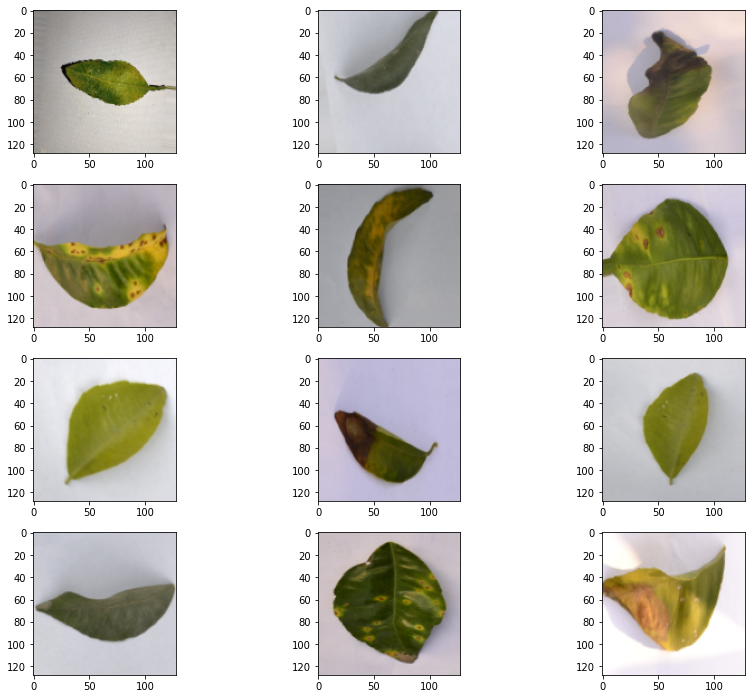

In [ ]:
#Check Augmented File from train generator
plt.figure(figsize=(12, 12))
for i in range(0, 12):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

#Model Training augmentation model 1

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(Conv2D(32, kernel_size=(3,3),input_shape= x.shape[1:], activation ='relu'))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(64, kernel_size=(3,3),activation ='relu'))
model2.add(MaxPooling2D(2,2))

model2.add(Conv2D(128, kernel_size=(3,3),activation ='relu'))
model2.add(MaxPooling2D(2,2))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(4, activation='softmax'))
model2.compile(loss=loss_function,
          optimizer=optimizer,
          metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

In [ ]:
#fit data to mode

history = model2.fit(datagen.flow(img_train , lab_train,
                    batch_size = 32),
                    epochs = 200,
                    verbose = 1,
                    validation_data =(img_test,lab_test))
los_score, acc_score = model2.evaluate(img_test , lab_test)
print('loss :', los_score*100)
print('acc :', acc_score*100)

Epoch 1/200
12/12 [==============================] - 3s 131ms/step - loss: 1.5505 - accuracy: 0.2976 - val_loss: 1.3553 - val_accuracy: 0.3021
Epoch 2/200
12/12 [==============================] - 1s 109ms/step - loss: 1.3406 - accuracy: 0.3425 - val_loss: 1.2339 - val_accuracy: 0.5521
Epoch 3/200
12/12 [==============================] - 1s 110ms/step - loss: 1.1473 - accuracy: 0.5734 - val_loss: 1.0490 - val_accuracy: 0.5104
Epoch 4/200
12/12 [==============================] - 1s 110ms/step - loss: 1.0485 - accuracy: 0.5444 - val_loss: 0.9846 - val_accuracy: 0.6042
Epoch 5/200
12/12 [==============================] - 1s 110ms/step - loss: 0.8932 - accuracy: 0.6378 - val_loss: 0.9340 - val_accuracy: 0.5417
Epoch 6/200
12/12 [==============================] - 1s 111ms/step - loss: 0.9704 - accuracy: 0.5908 - val_loss: 0.8431 - val_accuracy: 0.5729
Epoch 7/200
12/12 [==============================] - 1s 110ms/step - loss: 0.8778 - accuracy: 0.5875 - val_loss: 0.7669 - val_accuracy: 0.6458

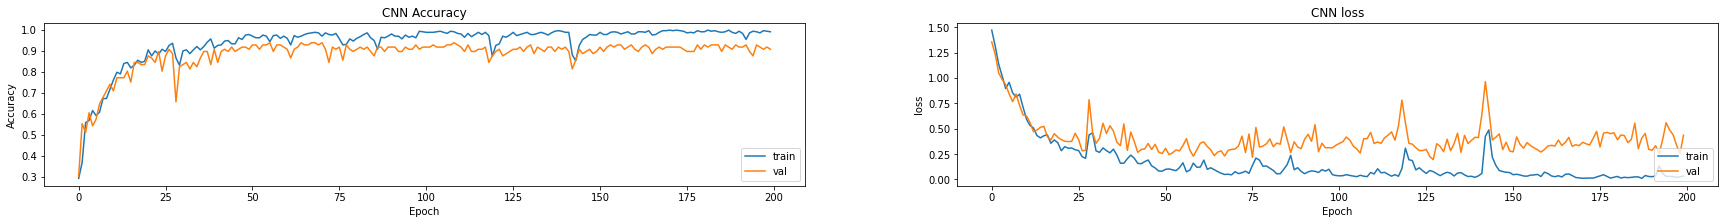

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(30,3))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('CNN Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
# ax[0].set_ylim(bottom=.1)
# ax[0].set_ylim(top=1.5)
ax[0].legend(['train', 'val'], loc='lower right')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('CNN loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(bottom=.1)
#ax[1].set_ylim(top=1.5)
ax[1].legend(['train', 'val'], loc='lower right')
plt.show()

Classification Report
              precision    recall  f1-score   support

  Black spot       0.96      0.83      0.89        30
      canker       1.00      0.97      0.98        30
    greening       0.86      1.00      0.92        30
     healthy       1.00      1.00      1.00        30

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120

Confussion Matrix
[[25  0  5  0]
 [ 1 29  0  0]
 [ 0  0 30  0]
 [ 0  0  0 30]]


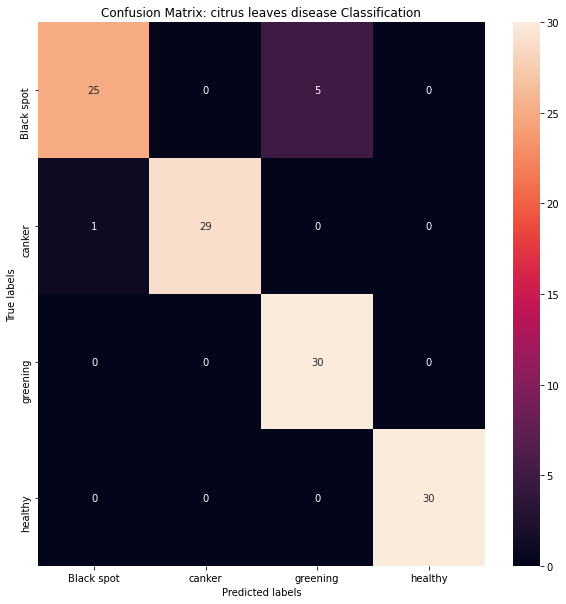

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns
prediksi = model2.predict(x_test.astype('float32'))
pred = np.argmax(prediksi, axis = 1)
target_names = KATEGORI
cm = confusion_matrix(y_test, pred)
print('Classification Report')
print(classification_report(y_test, pred, target_names= target_names))
print('==========================================================')
print('Confussion Matrix')
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot('111')
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: citrus leaves disease Classification'); 
ax.xaxis.set_ticklabels(list(target_names)); ax.yaxis.set_ticklabels(list(target_names));


In [ ]:
model2.save('model2_cnn_with_augmented.hdf5')
print("[INFO] Model saved ...")

[INFO] Model saved ...


#Model Training without augmentation model 1

In [ ]:

model2_noaug = tf.keras.models.Sequential()
model2_noaug.add(Conv2D(32, kernel_size=(3,3), strides=(2,2), input_shape= x.shape[1:], activation ='relu'))
model2_noaug.add(MaxPooling2D(2,2))

model2_noaug.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation ='relu'))
model2_noaug.add(MaxPooling2D(2,2))

model2_noaug.add(Conv2D(128, kernel_size=(3,3), strides=(2,2), activation ='relu'))
model2_noaug.add(MaxPooling2D(2,2))

model2_noaug.add(Flatten())
model2_noaug.add(Dense(128, activation='relu'))
model2_noaug.add(Dropout(0.5))
model2_noaug.add(Dense(4, activation='softmax'))
model2_noaug.compile(loss=loss_function,
          optimizer=optimizer,
          metrics=['accuracy'])


In [ ]:
model2_noaug.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 63, 63, 32)        896       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 128)             

In [ ]:
#fit data to model
history = model2_noaug.fit(img_train , lab_train,
                    batch_size = 32,
                    epochs = 500,
                    verbose = 1,
                    validation_data =(img_test,lab_test))
los_score, acc_score = model2_noaug.evaluate(img_test , lab_test)
print('loss :', los_score*100)
print('acc :', acc_score*100)

Epoch 1/500
12/12 [==============================] - 1s 23ms/step - loss: 1.3952 - accuracy: 0.2558 - val_loss: 1.3278 - val_accuracy: 0.2188
Epoch 2/500
12/12 [==============================] - 0s 12ms/step - loss: 1.3027 - accuracy: 0.3818 - val_loss: 1.1487 - val_accuracy: 0.5312
Epoch 3/500
12/12 [==============================] - 0s 12ms/step - loss: 1.2276 - accuracy: 0.4099 - val_loss: 1.0977 - val_accuracy: 0.5208
Epoch 4/500
12/12 [==============================] - 0s 10ms/step - loss: 1.1499 - accuracy: 0.4695 - val_loss: 0.9235 - val_accuracy: 0.6146
Epoch 5/500
12/12 [==============================] - 0s 11ms/step - loss: 1.1091 - accuracy: 0.5015 - val_loss: 0.8670 - val_accuracy: 0.6146
Epoch 6/500
12/12 [==============================] - 0s 11ms/step - loss: 1.0882 - accuracy: 0.5219 - val_loss: 0.9629 - val_accuracy: 0.5729
Epoch 7/500
12/12 [==============================] - 0s 10ms/step - loss: 0.9808 - accuracy: 0.5590 - val_loss: 0.8209 - val_accuracy: 0.6458
Epoch 

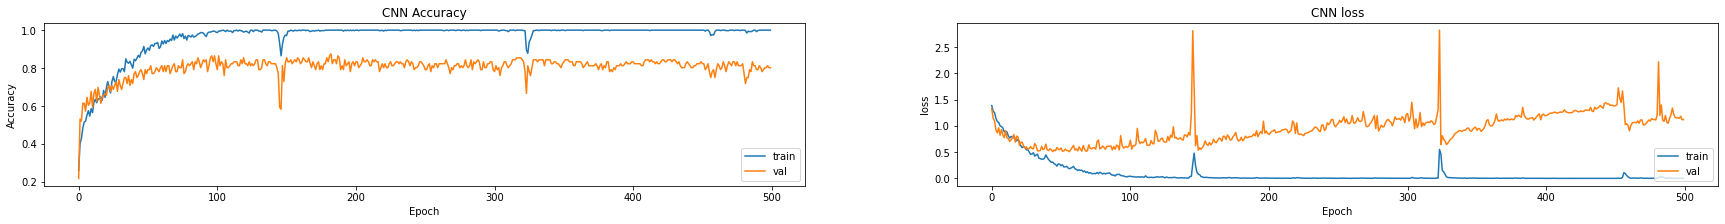

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(30,3))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('CNN Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
# ax[0].set_ylim(bottom=.1)
# ax[0].set_ylim(top=1.5)
ax[0].legend(['train', 'val'], loc='lower right')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('CNN loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(bottom=.1)
#ax[1].set_ylim(top=1.5)
ax[1].legend(['train', 'val'], loc='lower right')
plt.show()

Classification Report
              precision    recall  f1-score   support

  Black spot       0.57      0.77      0.66        30
      canker       1.00      0.73      0.85        30
    greening       0.67      0.60      0.63        30
     healthy       0.87      0.90      0.89        30

    accuracy                           0.75       120
   macro avg       0.78      0.75      0.76       120
weighted avg       0.78      0.75      0.76       120

Confussion Matrix
[[23  0  4  3]
 [ 4 22  3  1]
 [12  0 18  0]
 [ 1  0  2 27]]


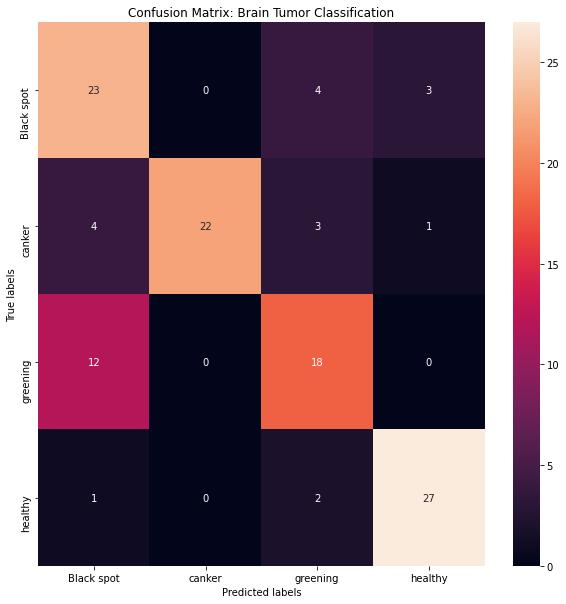

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns
prediksi = model2_noaug.predict(x_test.astype('float32'))
pred = np.argmax(prediksi, axis = 1)
target_names = KATEGORI
cm = confusion_matrix(y_test, pred)
print('Classification Report')
print(classification_report(y_test, pred, target_names= target_names))
print('==========================================================')
print('Confussion Matrix')
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot('111')
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: Brain Tumor Classification'); 
ax.xaxis.set_ticklabels(list(target_names)); ax.yaxis.set_ticklabels(list(target_names));


In [ ]:
model2_noaug.save('model2_cnn_with_augmented.hdf5')
print("[INFO] Model saved ...")

[INFO] Model saved ...


#Model 1 KFold Augmented

------------------------------------------------------
Training for fold1.....
Epoch 1/200
12/12 [==============================] - 2s 115ms/step - loss: 1.3984 - accuracy: 0.2344 - val_loss: 1.3781 - val_accuracy: 0.3333
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/1/assets
Epoch 2/200
12/12 [==============================] - 1s 103ms/step - loss: 1.3556 - accuracy: 0.3123 - val_loss: 1.2407 - val_accuracy: 0.3958
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/1/assets
Epoch 3/200
12/12 [==============================] - 1s 105ms/step - loss: 1.1762 - accuracy: 0.4869 - val_loss: 1.1118 - val_accuracy: 0.5625
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/1/assets
Epoch 4/200
12/12 [==============================] - 1s 102ms/step - loss: 1.1114 - accuracy: 0.5052 - val_loss: 1.0257 - val_accuracy: 0.5312
INFO:tensorflow:Assets written to: /content

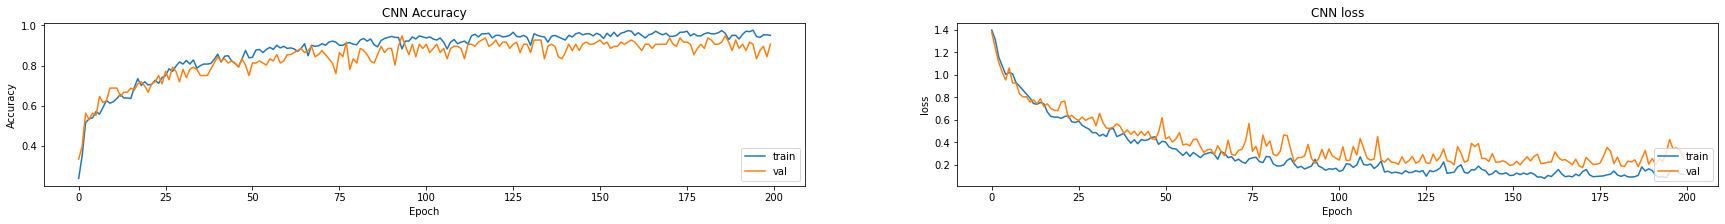

------------------------------------------------------
Training for fold2.....
Epoch 1/200
12/12 [==============================] - 2s 113ms/step - loss: 1.3982 - accuracy: 0.2234 - val_loss: 1.3842 - val_accuracy: 0.2604
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/2/assets
Epoch 2/200
12/12 [==============================] - 1s 103ms/step - loss: 1.3855 - accuracy: 0.2710 - val_loss: 1.3788 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/2/assets
Epoch 3/200
12/12 [==============================] - 1s 103ms/step - loss: 1.3647 - accuracy: 0.2524 - val_loss: 1.3806 - val_accuracy: 0.2604
Epoch 4/200
12/12 [==============================] - 1s 104ms/step - loss: 1.3166 - accuracy: 0.3533 - val_loss: 1.2905 - val_accuracy: 0.3750
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/2/assets
Epoch 5/200
12/12 [========================

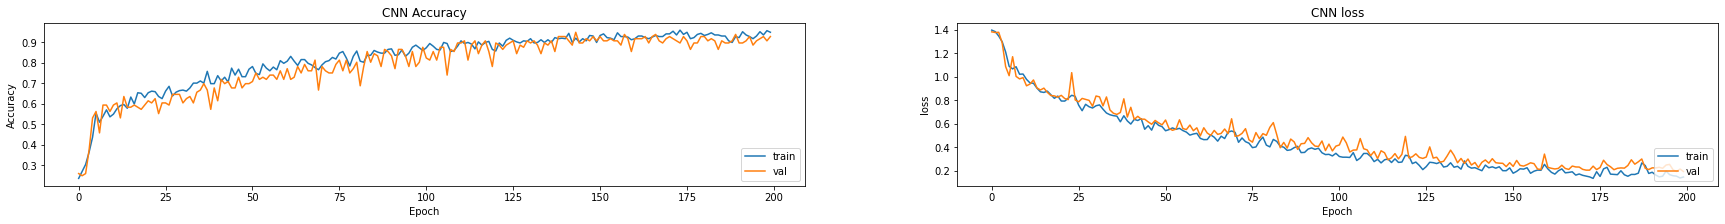

------------------------------------------------------
Training for fold3.....
Epoch 1/200
12/12 [==============================] - 2s 115ms/step - loss: 1.4058 - accuracy: 0.2312 - val_loss: 1.3866 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/3/assets
Epoch 2/200
12/12 [==============================] - 1s 105ms/step - loss: 1.3846 - accuracy: 0.2665 - val_loss: 1.3708 - val_accuracy: 0.3438
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/3/assets
Epoch 3/200
12/12 [==============================] - 1s 110ms/step - loss: 1.3482 - accuracy: 0.3474 - val_loss: 1.2239 - val_accuracy: 0.3854
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/3/assets
Epoch 4/200
12/12 [==============================] - 1s 107ms/step - loss: 1.2018 - accuracy: 0.4248 - val_loss: 1.0327 - val_accuracy: 0.5625
INFO:tensorflow:Assets written to: /content

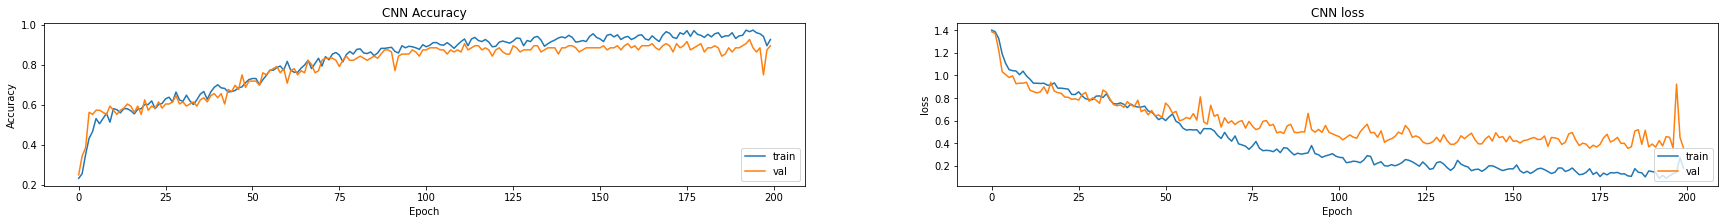

------------------------------------------------------
Training for fold4.....
Epoch 1/200
12/12 [==============================] - 2s 120ms/step - loss: 1.4152 - accuracy: 0.2294 - val_loss: 1.3836 - val_accuracy: 0.2604
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/4/assets
Epoch 2/200
12/12 [==============================] - 1s 106ms/step - loss: 1.3730 - accuracy: 0.3004 - val_loss: 1.2027 - val_accuracy: 0.5104
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/4/assets
Epoch 3/200
12/12 [==============================] - 1s 108ms/step - loss: 1.1777 - accuracy: 0.5198 - val_loss: 1.1638 - val_accuracy: 0.5208
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/4/assets
Epoch 4/200
12/12 [==============================] - 1s 116ms/step - loss: 1.1218 - accuracy: 0.5455 - val_loss: 1.0797 - val_accuracy: 0.4896
INFO:tensorflow:Assets written to: /content

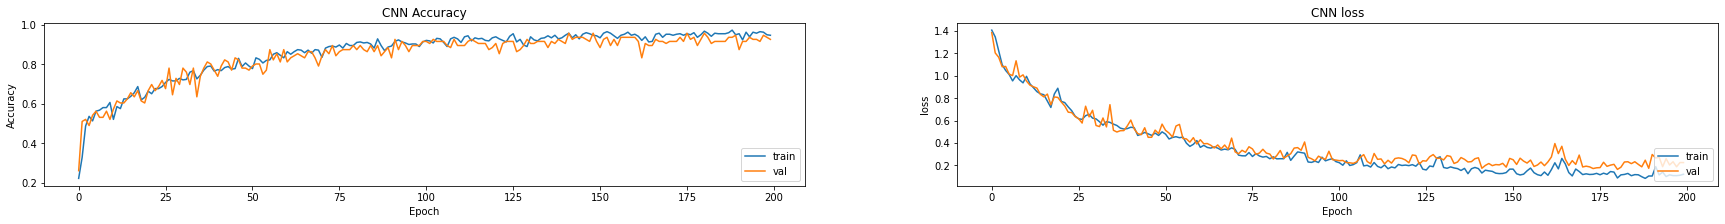

------------------------------------------------------
Training for fold5.....
Epoch 1/200
12/12 [==============================] - 2s 127ms/step - loss: 1.4053 - accuracy: 0.2471 - val_loss: 1.2572 - val_accuracy: 0.3646
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/5/assets
Epoch 2/200
12/12 [==============================] - 1s 106ms/step - loss: 1.2649 - accuracy: 0.4063 - val_loss: 1.1085 - val_accuracy: 0.5625
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 1/5/assets
Epoch 3/200
12/12 [==============================] - 1s 108ms/step - loss: 1.1784 - accuracy: 0.5093 - val_loss: 1.1659 - val_accuracy: 0.4792
Epoch 4/200
12/12 [==============================] - 1s 106ms/step - loss: 1.1379 - accuracy: 0.4923 - val_loss: 1.1889 - val_accuracy: 0.3854
Epoch 5/200
12/12 [==============================] - 1s 106ms/step - loss: 1.0417 - accuracy: 0.5451 - val_loss: 0.9743 - val_accuracy: 0.5729
IN

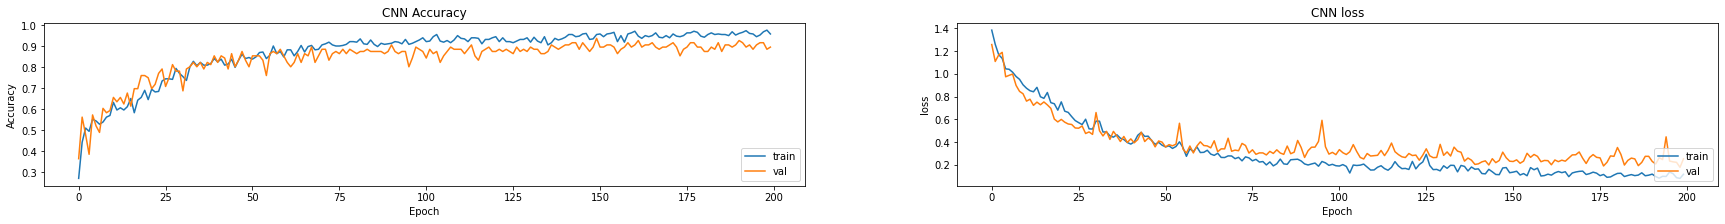

In [ ]:
num_fold = 5
kfold = StratifiedKFold(n_splits= num_fold, shuffle=True, random_state=1)
acc_per_fold = []
loss_per_fold =[]
fold_no = 1

for train, test in kfold.split(inputs, targets):
    kf = tf.keras.models.Sequential()
    kf.add(Conv2D(32, kernel_size=(3,3), strides=(2,2), input_shape= x.shape[1:], activation ='relu'))
    kf.add(MaxPooling2D(2,2))
    
    kf.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation ='relu'))
    kf.add(MaxPooling2D(2,2))
    
    kf.add(Conv2D(128, kernel_size=(3,3), strides=(2,2), activation ='relu'))
    kf.add(MaxPooling2D(2,2))
    
    kf.add(Flatten())
    kf.add(Dense(128, activation='relu'))
    kf.add(Dense(4, activation='softmax'))
    kf.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
    
    #Generate Print
    print('------------------------------------------------------')
    print(f'Training for fold{fold_no}.....')
    checkpoint_path = f'/content/drive/MyDrive/Colab Notebooks/save_model/Model 1/{fold_no}'
    os.mkdir(checkpoint_path)
    callbacks = [
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
    ]
    
    #fit Model
    history = kf.fit(datagen.flow(inputs[train], targets[train],
                    batch_size=32),
                    epochs=200,
                    verbose=1,
                    validation_data = (inputs[test], targets[test]),
                    callbacks = callbacks
                    )
    
    #Generate metrics
    scores = kf.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score Evaluasi Fold Ke - {fold_no} : {kf.metrics_names[0]}; {kf.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1,2,figsize=(30,3))

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('CNN Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    # ax[0].set_ylim(bottom=.1)
    # ax[0].set_ylim(top=1.5)
    ax[0].legend(['train', 'val'], loc='lower right')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('CNN loss')
    ax[1].set_ylabel('loss')
    ax[1].set_xlabel('Epoch')
    #ax[1].set_ylim(bottom=.1)
    #ax[1].set_ylim(top=1.5)
    ax[1].legend(['train', 'val'], loc='lower right')
    plt.show()
    
    #incare fold
    fold_no = fold_no +1
    

In [ ]:
# == Provide average scores ==
print('========================================================================')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score per fold


NameError: ignored

Classificat  ion Report
              precision    recall  f1-score   support

  Black spot       0.81      0.87      0.84        30
      canker       0.93      0.90      0.92        30
    greening       0.89      0.80      0.84        30
     healthy       0.94      1.00      0.97        30

    accuracy                           0.89       120
   macro avg       0.89      0.89      0.89       120
weighted avg       0.89      0.89      0.89       120

Confussion Matrix
[[26  1  3  0]
 [ 3 27  0  0]
 [ 3  1 24  2]
 [ 0  0  0 30]]


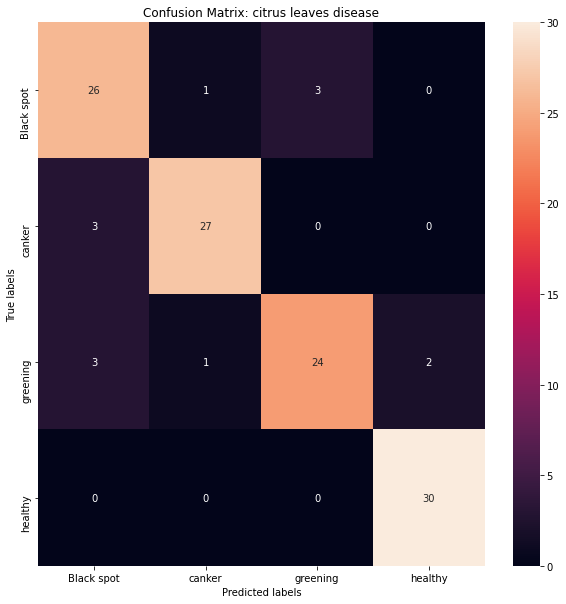

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
prediksi = kf.predict(x_test.astype('float32'))
pred = np.argmax(prediksi, axis = 1)
target_names = KATEGORI
cm = confusion_matrix(y_test, pred)
print('Classificat  ion Report')
print(classification_report(y_test, pred, target_names= target_names))
print('==========================================================')
print('Confussion Matrix')
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot('111')
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: citrus leaves disease'); 
ax.xaxis.set_ticklabels(list(target_names)); ax.yaxis.set_ticklabels(list(target_names));

#Test Kfold with augmentation model 1

In [ ]:
test_fold1 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_model/Model 1/5')
test_fold1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 63, 63, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 128)              

Classification Report
              precision    recall  f1-score   support

  Black spot       0.96      0.87      0.91        30
      canker       1.00      1.00      1.00        30
    greening       0.88      0.97      0.92        30
     healthy       1.00      1.00      1.00        30

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

Confussion Matrix
[[26  0  4  0]
 [ 0 30  0  0]
 [ 1  0 29  0]
 [ 0  0  0 30]]


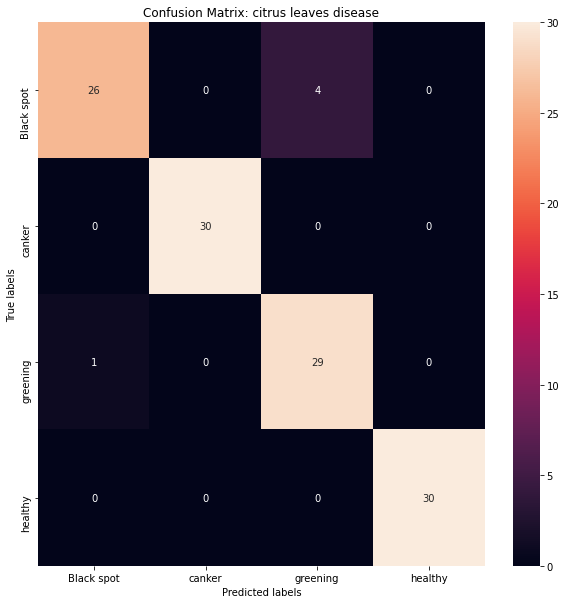

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
prediksi = test_fold1.predict(x_test.astype('float32'))
pred = np.argmax(prediksi, axis = 1)
target_names = KATEGORI
cm = confusion_matrix(y_test, pred)
print('Classification Report')
print(classification_report(y_test, pred, target_names= target_names))
print('==========================================================')
print('Confussion Matrix')
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot('111')
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: citrus leaves disease'); 
ax.xaxis.set_ticklabels(list(target_names)); ax.yaxis.set_ticklabels(list(target_names));

#KFOLD without augmented model 1

In [ ]:
num_fold = 5
kfold = StratifiedKFold(n_splits= num_fold, shuffle=True, random_state=1)
acc_per_fold = []
loss_per_fold =[]
fold_no = 1

for train, test in kfold.split(inputs, targets):
    kf2 = tf.keras.models.Sequential()
    kf2.add(Conv2D(32, kernel_size=(3,3), strides=(2,2), input_shape= x.shape[1:], activation ='relu'))
    kf2.add(MaxPooling2D(2,2))
    
    kf2.add(Conv2D(64, kernel_size=(3,3), strides=(2,2), activation ='relu'))
    kf2.add(MaxPooling2D(2,2))
    
    kf2.add(Conv2D(128, kernel_size=(3,3), strides=(2,2), activation ='relu'))
    kf2.add(MaxPooling2D(2,2))
    
    kf2.add(Flatten())
    kf2.add(Dense(128, activation='relu'))
    kf.add(Dense(4, activation='softmax'))
    kf2.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
    
    #Generate Print
    print('------------------------------------------------------')
    print(f'Training for fold{fold_no}.....')

    checkpoint_path = f'/content/drive/MyDrive/Colab Notebooks/save_model/model 1 without augmented/{fold_no}'
    os.mkdir(checkpoint_path)
    callbacks = [
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
    ]
    
    #fit Model
    history = kf.fit(inputs[train], targets[train],
                    batch_size=32,
                    epochs=200,
                    verbose=1,
                    validation_data = (inputs[test], targets[test]),
                    callbacks =callbacks
                    )
    
    #Generate metrics
    scores = kf.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score Evaluasi Fold Ke - {fold_no} : {kf.metrics_names[0]}; {kf.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1,2,figsize=(30,3))

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('CNN Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    # ax[0].set_ylim(bottom=.1)
    # ax[0].set_ylim(top=1.5)
    ax[0].legend(['train', 'val'], loc='lower right')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('CNN loss')
    ax[1].set_ylabel('loss')
    ax[1].set_xlabel('Epoch')
    #ax[1].set_ylim(bottom=.1)
    #ax[1].set_ylim(top=1.5)
    ax[1].legend(['train', 'val'], loc='lower right')
    plt.show()
    
    #incare fold
    fold_no = fold_no +1
    

------------------------------------------------------
Training for fold1.....


FileExistsError: ignored

In [ ]:
# == Provide average scores ==
print('========================================================================')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 1.5890450477600098 - Accuracy: 68.75%
------------------------------------------------------------------------
> Fold 2 - Loss: 1.6266517639160156 - Accuracy: 75.0%
------------------------------------------------------------------------
> Fold 3 - Loss: 2.0405385494232178 - Accuracy: 71.875%
------------------------------------------------------------------------
> Fold 4 - Loss: 4.20298957824707 - Accuracy: 63.54166865348816%
------------------------------------------------------------------------
> Fold 5 - Loss: 2.634901285171509 - Accuracy: 66.66666865348816%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 69.16666746139526 (+- 3.9856505378040565)
> Loss: 2.4188252449035645
------------------------------------------------------------------------


Classificat  ion Report
              precision    recall  f1-score   support

  Black spot       0.92      0.92      0.92       120
      canker       0.96      0.95      0.95       120
    greening       0.88      0.89      0.88       120
     healthy       0.97      0.97      0.97       120

    accuracy                           0.93       480
   macro avg       0.93      0.93      0.93       480
weighted avg       0.93      0.93      0.93       480

Confussion Matrix
[[110   0  10   0]
 [  3 114   3   0]
 [  6   4 107   3]
 [  0   1   2 117]]


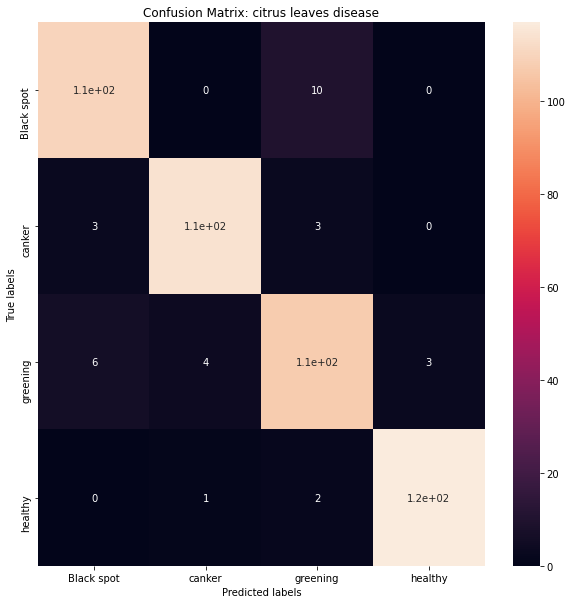

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
prediksi = kf.predict(x_train.astype('float32'))
pred = np.argmax(prediksi, axis = 1)
target_names = KATEGORI
cm = confusion_matrix(y_train, pred)
print('Classificat  ion Report')
print(classification_report(y_train, pred, target_names= target_names))
print('==========================================================')
print('Confussion Matrix')
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot('111')
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: citrus leaves disease'); 
ax.xaxis.set_ticklabels(list(target_names)); ax.yaxis.set_ticklabels(list(target_names));

#Test Kfold without augmentation model 1

In [ ]:
test_fold1 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_model/Model 2 without augmented/1')
test_fold1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

Classification Report
              precision    recall  f1-score   support

  Black spot       0.69      0.83      0.76        30
      canker       0.78      0.93      0.85        30
    greening       0.75      0.50      0.60        30
     healthy       0.96      0.90      0.93        30

    accuracy                           0.79       120
   macro avg       0.80      0.79      0.78       120
weighted avg       0.80      0.79      0.78       120

Confussion Matrix
[[25  2  2  1]
 [ 0 28  2  0]
 [11  4 15  0]
 [ 0  2  1 27]]


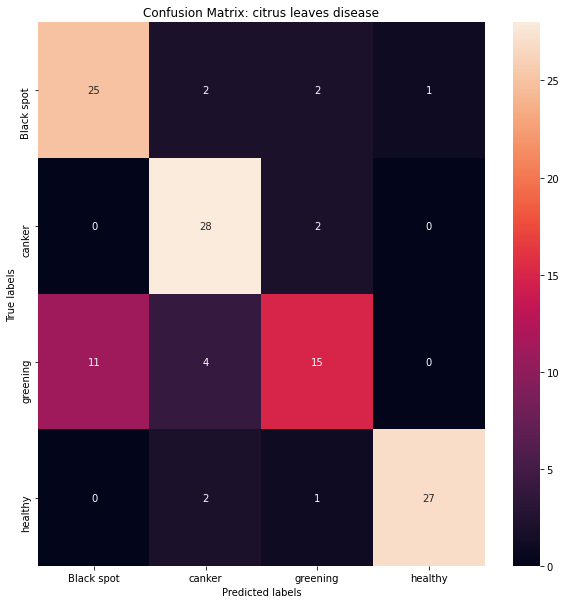

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
prediksi = test_fold1.predict(x_test.astype('float32'))
pred = np.argmax(prediksi, axis = 1)
target_names = KATEGORI
cm = confusion_matrix(y_test, pred)
print('Classification Report')
print(classification_report(y_test, pred, target_names= target_names))
print('==========================================================')
print('Confussion Matrix')
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot('111')
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: citrus leaves disease'); 
ax.xaxis.set_ticklabels(list(target_names)); ax.yaxis.set_ticklabels(list(target_names));

#model 2 implementation

In [ ]:
model= tf.keras.models.Sequential()
model.add(Conv2D(16, kernel_size=(3,3),  input_shape= x.shape[1:], activation ='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, kernel_size=(3,3),  activation ='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size=(3,3),  activation ='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size=(3,3),  activation ='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size=(3,3),  activation ='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(loss=loss_function,
          optimizer=optimizer,
          metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 12, 12, 64)      

In [ ]:
#fit data to model
history = model.fit(datagen.flow(img_train , lab_train,
                    batch_size = 32),
                    epochs = 200,
                    verbose = 1,
                    validation_data =(img_test,lab_test)
                    )
los_score, acc_score = model.evaluate(img_test , lab_test, steps = len(x_test)/32)
print('loss :', los_score*100)
print('acc :', acc_score*100)

Epoch 1/200
12/12 [==============================] - 2s 137ms/step - loss: 1.3997 - accuracy: 0.2423 - val_loss: 1.2903 - val_accuracy: 0.3229
Epoch 2/200
12/12 [==============================] - 1s 108ms/step - loss: 1.3114 - accuracy: 0.3154 - val_loss: 1.3350 - val_accuracy: 0.3229
Epoch 3/200
12/12 [==============================] - 1s 109ms/step - loss: 1.3195 - accuracy: 0.3494 - val_loss: 1.1713 - val_accuracy: 0.6458
Epoch 4/200
12/12 [==============================] - 1s 110ms/step - loss: 1.2085 - accuracy: 0.5019 - val_loss: 0.9069 - val_accuracy: 0.6667
Epoch 5/200
12/12 [==============================] - 1s 112ms/step - loss: 1.1670 - accuracy: 0.4711 - val_loss: 1.0323 - val_accuracy: 0.6250
Epoch 6/200
12/12 [==============================] - 1s 108ms/step - loss: 1.2106 - accuracy: 0.4569 - val_loss: 0.9975 - val_accuracy: 0.5729
Epoch 7/200
12/12 [==============================] - 1s 108ms/step - loss: 1.1298 - accuracy: 0.4760 - val_loss: 0.9043 - val_accuracy: 0.6354

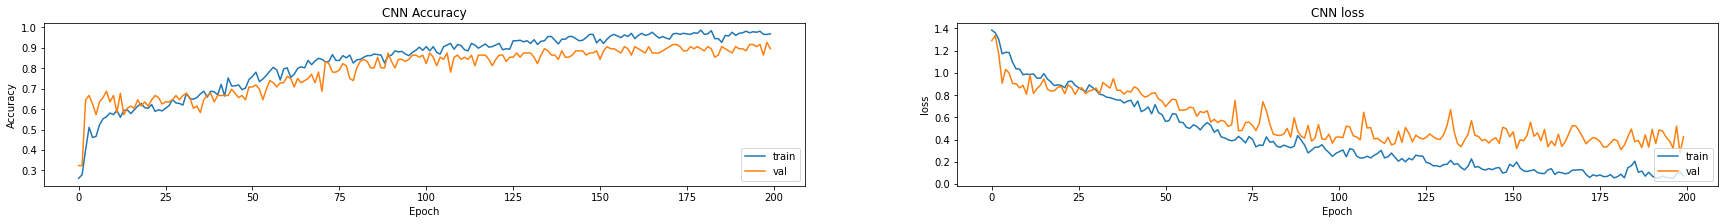

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(30,3))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('CNN Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
# ax[0].set_ylim(bottom=.1)
# ax[0].set_ylim(top=1.5)
ax[0].legend(['train', 'val'], loc='lower right')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('CNN loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(bottom=.1)
#ax[1].set_ylim(top=1.5)
ax[1].legend(['train', 'val'], loc='lower right')
plt.show()

Classification Report
              precision    recall  f1-score   support

  Black spot       0.89      0.80      0.84        30
      canker       0.93      0.93      0.93        30
    greening       0.82      0.90      0.86        30
     healthy       1.00      1.00      1.00        30

    accuracy                           0.91       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120

Confussion Matrix
[[24  2  4  0]
 [ 0 28  2  0]
 [ 3  0 27  0]
 [ 0  0  0 30]]


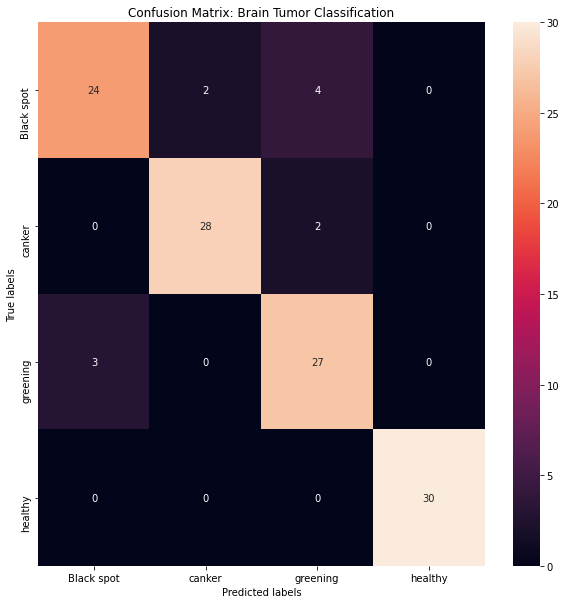

In [ ]:

from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns
prediksi = model.predict(x_test.astype('float32'))
pred = np.argmax(prediksi, axis = 1)
target_names = KATEGORI
cm = confusion_matrix(y_test, pred)
print('Classification Report')
print(classification_report(y_test, pred, target_names= target_names))
print('==========================================================')
print('Confussion Matrix')
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot('111')
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: Brain Tumor Classification'); 
ax.xaxis.set_ticklabels(list(target_names)); ax.yaxis.set_ticklabels(list(target_names));


In [ ]:
model.save('model_cnn_with_augmented.hdf5')
print("[INFO] Model saved ...")

[INFO] Model saved ...


#model 2 implementation without augmented

In [ ]:
model_noaug= tf.keras.models.Sequential()
model_noaug.add(Conv2D(16, kernel_size=(3,3),  input_shape= x.shape[1:], activation ='relu'))
model_noaug.add(MaxPooling2D(2,2))

model_noaug.add(Conv2D(32, kernel_size=(3,3),  activation ='relu'))
model_noaug.add(MaxPooling2D(2,2))

model_noaug.add(Conv2D(64, kernel_size=(3,3),  activation ='relu'))
model_noaug.add(MaxPooling2D(2,2))

model_noaug.add(Conv2D(64, kernel_size=(3,3),  activation ='relu'))
model_noaug.add(MaxPooling2D(2,2))

model_noaug.add(Conv2D(64, kernel_size=(3,3),  activation ='relu'))
model_noaug.add(MaxPooling2D(2,2))

model_noaug.add(Flatten())
model_noaug.add(Dense(512, activation='relu'))
model_noaug.add(Dense(4, activation='softmax'))
model_noaug.compile(loss=loss_function,
          optimizer=optimizer,
          metrics=['accuracy'])
model_noaug.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 12, 12, 64)       

In [ ]:
#fit data to model
history = model_noaug.fit(img_train , lab_train,
                    batch_size = 32,
                    epochs = 500,
                    verbose = 1,
                    validation_data =(img_test,lab_test))
los_score, acc_score = model_noaug.evaluate(img_test , lab_test, steps = len(x_test)/32)
print('loss :', los_score*100)
print('acc :', acc_score*100)

Epoch 1/500
12/12 [==============================] - 1s 29ms/step - loss: 1.4007 - accuracy: 0.2490 - val_loss: 1.3831 - val_accuracy: 0.2188
Epoch 2/500
12/12 [==============================] - 0s 14ms/step - loss: 1.3523 - accuracy: 0.3330 - val_loss: 1.0242 - val_accuracy: 0.5938
Epoch 3/500
12/12 [==============================] - 0s 13ms/step - loss: 1.1046 - accuracy: 0.5492 - val_loss: 1.0569 - val_accuracy: 0.5208
Epoch 4/500
12/12 [==============================] - 0s 12ms/step - loss: 1.0400 - accuracy: 0.5704 - val_loss: 0.9741 - val_accuracy: 0.5521
Epoch 5/500
12/12 [==============================] - 0s 12ms/step - loss: 0.9948 - accuracy: 0.5184 - val_loss: 0.9577 - val_accuracy: 0.5417
Epoch 6/500
12/12 [==============================] - 0s 12ms/step - loss: 0.9488 - accuracy: 0.6028 - val_loss: 0.9562 - val_accuracy: 0.5312
Epoch 7/500
12/12 [==============================] - 0s 12ms/step - loss: 0.8890 - accuracy: 0.5981 - val_loss: 0.9815 - val_accuracy: 0.5417
Epoch 

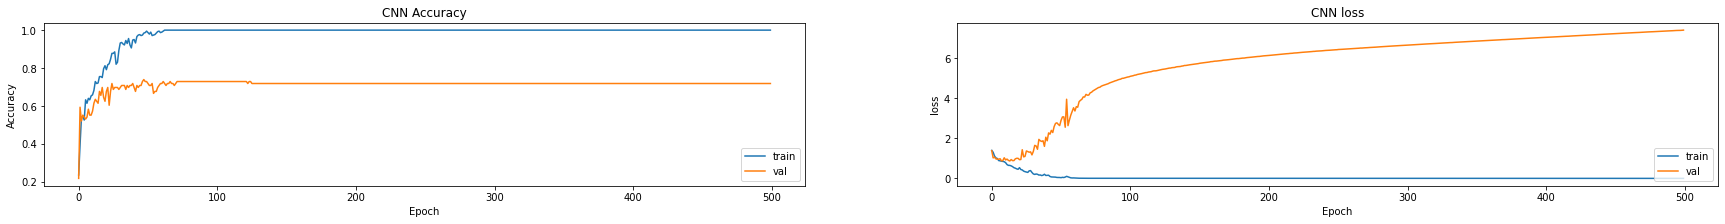

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(30,3))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('CNN Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
# ax[0].set_ylim(bottom=.1)
# ax[0].set_ylim(top=1.5)
ax[0].legend(['train', 'val'], loc='lower right')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('CNN loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(bottom=.1)
#ax[1].set_ylim(top=1.5)
ax[1].legend(['train', 'val'], loc='lower right')
plt.show()

Classification Report
              precision    recall  f1-score   support

  Black spot       0.59      0.77      0.67        30
      canker       0.79      0.77      0.78        30
    greening       0.63      0.57      0.60        30
     healthy       0.96      0.80      0.87        30

    accuracy                           0.73       120
   macro avg       0.74      0.73      0.73       120
weighted avg       0.74      0.72      0.73       120

Confussion Matrix
[[23  3  4  0]
 [ 2 23  4  1]
 [11  2 17  0]
 [ 3  1  2 24]]


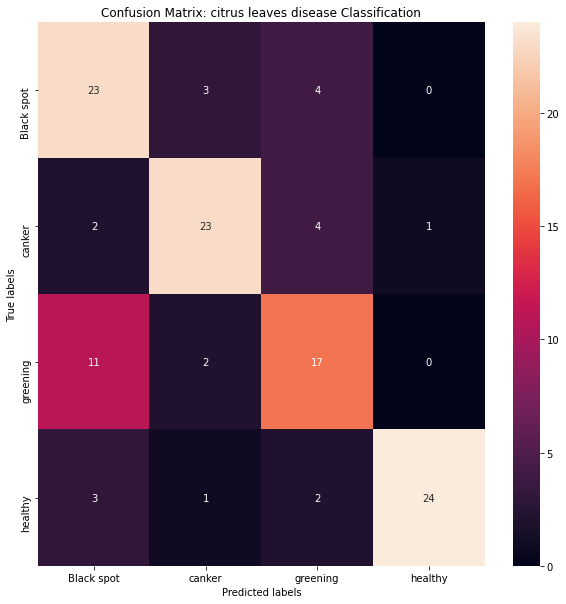

In [ ]:

from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns
prediksi = model_noaug.predict(x_test.astype('float32'))
pred = np.argmax(prediksi, axis = 1)
target_names = KATEGORI
cm = confusion_matrix(y_test, pred)
print('Classification Report')
print(classification_report(y_test, pred, target_names= target_names))
print('==========================================================')
print('Confussion Matrix')
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot('111')
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: citrus leaves disease Classification'); 
ax.xaxis.set_ticklabels(list(target_names)); ax.yaxis.set_ticklabels(list(target_names));


In [ ]:
model_noaug.save('model_cnn_without_augmented.hdf5')
print("[INFO] Model saved ...")

[INFO] Model saved ...


#KFOLD with augmented model 2


------------------------------------------------------
Training for fold1.....
Epoch 1/200
12/12 [==============================] - 2s 125ms/step - loss: 1.4412 - accuracy: 0.2459 - val_loss: 1.3414 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/1/assets
Epoch 2/200
12/12 [==============================] - 1s 111ms/step - loss: 1.3971 - accuracy: 0.2240 - val_loss: 1.3842 - val_accuracy: 0.2500
Epoch 3/200
12/12 [==============================] - 1s 113ms/step - loss: 1.3833 - accuracy: 0.2533 - val_loss: 1.2510 - val_accuracy: 0.4896
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/1/assets
Epoch 4/200
12/12 [==============================] - 1s 111ms/step - loss: 1.2871 - accuracy: 0.3735 - val_loss: 1.2313 - val_accuracy: 0.5104
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/1/assets
Epoch 5/200
12/12 [========================

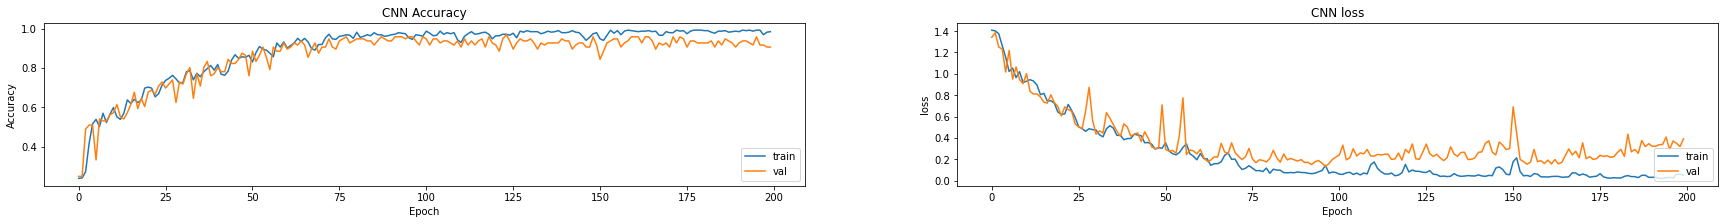

------------------------------------------------------
Training for fold2.....
Epoch 1/200
12/12 [==============================] - 2s 120ms/step - loss: 1.5429 - accuracy: 0.2582 - val_loss: 1.3873 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/2/assets
Epoch 2/200
12/12 [==============================] - 1s 109ms/step - loss: 1.3894 - accuracy: 0.2425 - val_loss: 1.3862 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/2/assets
Epoch 3/200
12/12 [==============================] - 1s 110ms/step - loss: 1.3811 - accuracy: 0.2896 - val_loss: 1.3387 - val_accuracy: 0.4896
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/2/assets
Epoch 4/200
12/12 [==============================] - 1s 107ms/step - loss: 1.2665 - accuracy: 0.5129 - val_loss: 1.2994 - val_accuracy: 0.4479
INFO:tensorflow:Assets written to: /content

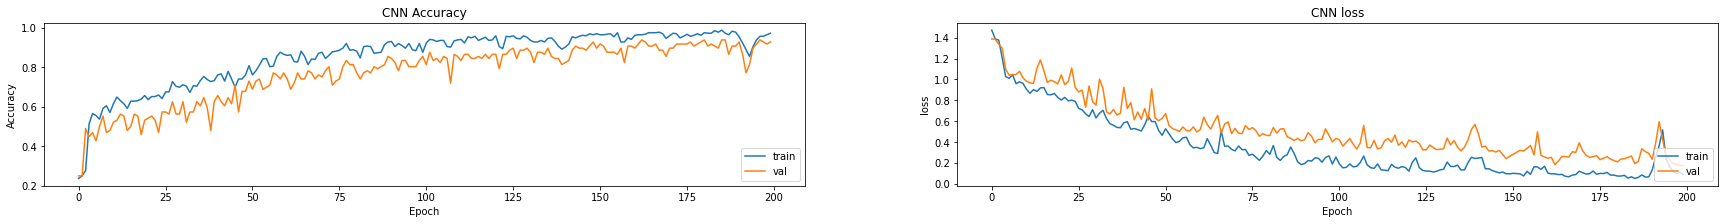

------------------------------------------------------
Training for fold3.....
Epoch 1/200
12/12 [==============================] - 2s 121ms/step - loss: 1.3980 - accuracy: 0.2034 - val_loss: 1.3875 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/3/assets
Epoch 2/200
12/12 [==============================] - 1s 109ms/step - loss: 1.3890 - accuracy: 0.2628 - val_loss: 1.3871 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/3/assets
Epoch 3/200
12/12 [==============================] - 1s 109ms/step - loss: 1.3889 - accuracy: 0.2555 - val_loss: 1.3868 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/3/assets
Epoch 4/200
12/12 [==============================] - 1s 111ms/step - loss: 1.3874 - accuracy: 0.2349 - val_loss: 1.3868 - val_accuracy: 0.2500
Epoch 5/200
12/12 [========================

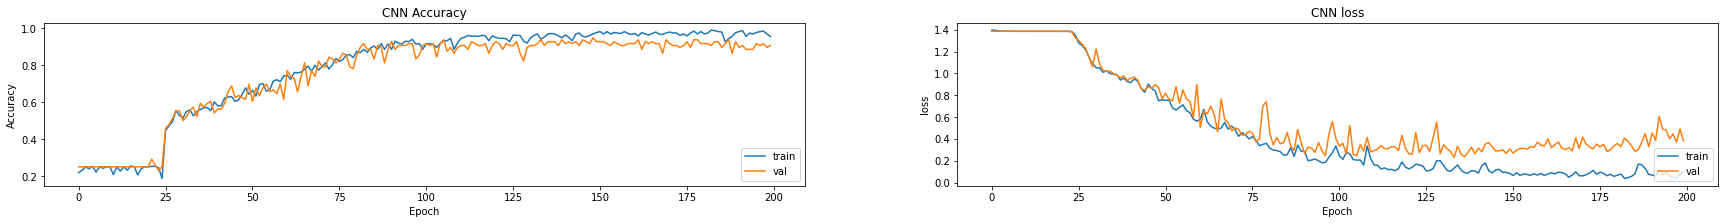

------------------------------------------------------
Training for fold4.....
Epoch 1/200
12/12 [==============================] - 2s 121ms/step - loss: 1.4040 - accuracy: 0.2806 - val_loss: 1.3854 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/4/assets
Epoch 2/200
12/12 [==============================] - 1s 111ms/step - loss: 1.3884 - accuracy: 0.2469 - val_loss: 1.3740 - val_accuracy: 0.3438
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/4/assets
Epoch 3/200
12/12 [==============================] - 1s 111ms/step - loss: 1.3869 - accuracy: 0.2808 - val_loss: 1.3132 - val_accuracy: 0.4688
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/4/assets
Epoch 4/200
12/12 [==============================] - 1s 110ms/step - loss: 1.3343 - accuracy: 0.3815 - val_loss: 1.2684 - val_accuracy: 0.2917
INFO:tensorflow:Assets written to: /content

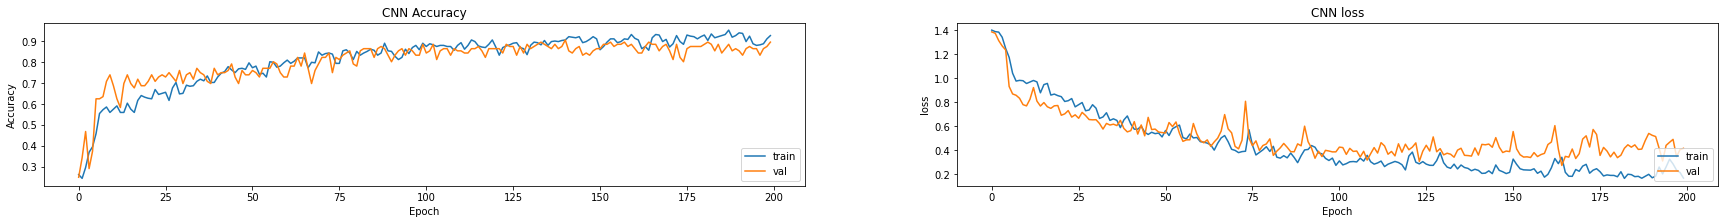

------------------------------------------------------
Training for fold5.....
Epoch 1/200
12/12 [==============================] - 2s 124ms/step - loss: 1.4068 - accuracy: 0.2012 - val_loss: 1.3870 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/5/assets
Epoch 2/200
12/12 [==============================] - 1s 110ms/step - loss: 1.3888 - accuracy: 0.2749 - val_loss: 1.3863 - val_accuracy: 0.2500
INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/save_model/Model 2/5/assets
Epoch 3/200
12/12 [==============================] - 1s 116ms/step - loss: 1.3867 - accuracy: 0.2763 - val_loss: 1.3865 - val_accuracy: 0.2500
Epoch 4/200
12/12 [==============================] - 1s 110ms/step - loss: 1.3865 - accuracy: 0.2601 - val_loss: 1.3865 - val_accuracy: 0.2500
Epoch 5/200
12/12 [==============================] - 1s 111ms/step - loss: 1.3862 - accuracy: 0.2570 - val_loss: 1.3864 - val_accuracy: 0.2500
Ep

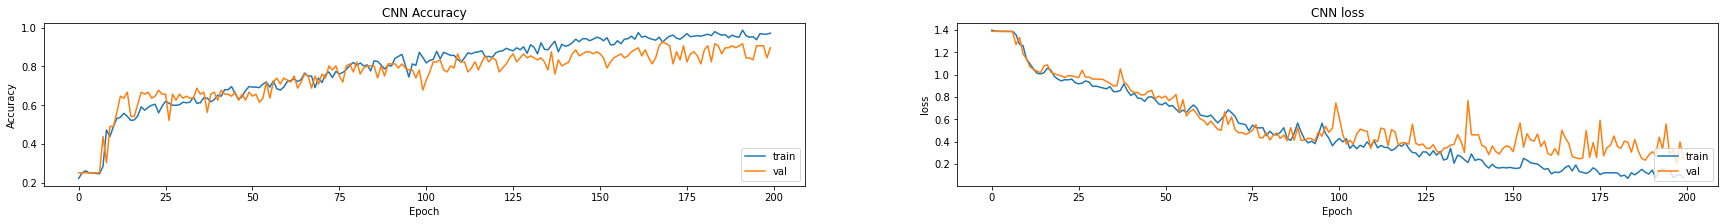

In [ ]:
num_fold = 5
kfold = StratifiedKFold(n_splits= num_fold, shuffle=True, random_state=1)
acc_per_fold = []
loss_per_fold =[]
fold_no = 1

for train, test in kfold.split(inputs, targets):
    kf2= tf.keras.models.Sequential()
    kf2.add(Conv2D(16, kernel_size=(3,3),  input_shape= x.shape[1:], activation ='relu'))
    kf2.add(MaxPooling2D(2,2))

    kf2.add(Conv2D(32, kernel_size=(3,3),  activation ='relu'))
    kf2.add(MaxPooling2D(2,2))

    kf2.add(Conv2D(64, kernel_size=(3,3),  activation ='relu'))
    kf2.add(MaxPooling2D(2,2))

    kf2.add(Conv2D(64, kernel_size=(3,3),  activation ='relu'))
    kf2.add(MaxPooling2D(2,2))

    kf2.add(Conv2D(64, kernel_size=(3,3),  activation ='relu'))
    kf2.add(MaxPooling2D(2,2))

    kf2.add(Flatten())
    kf2.add(Dense(512, activation='relu'))
    kf2.add(Dense(4, activation='softmax'))
    kf2.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
    
     #Generate Print
    print('------------------------------------------------------')
    print(f'Training for fold{fold_no}.....')
    checkpoint_path = f'/content/drive/MyDrive/Colab Notebooks/save_model/Model 2/{fold_no}'
    os.mkdir(checkpoint_path)
    callbacks = [
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
    ]
    
    #fit Model
    history = kf2.fit(datagen.flow(inputs[train], targets[train],
                    batch_size=32),
                    epochs=200,
                    verbose=1,
                    validation_data = (inputs[test], targets[test]),
                    callbacks = callbacks
                    )
    steps = len(x_test)/32
    
    #Generate metrics
    scores = kf2.evaluate(inputs[test], targets[test], verbose=0, steps = steps )
    print(f'Score Evaluasi Fold Ke - {fold_no} : {kf2.metrics_names[0]}; {kf2.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1,2,figsize=(30,3))

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('CNN Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    # ax[0].set_ylim(bottom=.1)
    # ax[0].set_ylim(top=1.5)
    ax[0].legend(['train', 'val'], loc='lower right')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('CNN loss')
    ax[1].set_ylabel('loss')
    ax[1].set_xlabel('Epoch')
    #ax[1].set_ylim(bottom=.1)
    #ax[1].set_ylim(top=1.5)
    ax[1].legend(['train', 'val'], loc='lower right')
    plt.show()
    
    #incare fold
    fold_no = fold_no +1
    

In [ ]:

# == Provide average scores ==
print('========================================================================')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.39209631085395813 - Accuracy: 90.625%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.17483516037464142 - Accuracy: 92.70833134651184%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.3820519745349884 - Accuracy: 90.625%
------------------------------------------------------------------------
> Fold 4 - Loss: 0.41676703095436096 - Accuracy: 89.58333134651184%
------------------------------------------------------------------------
> Fold 5 - Loss: 0.24844205379486084 - Accuracy: 89.58333134651184%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 90.6249988079071 (+- 1.1410886614695113)
> Loss: 0.32283850610256193
------------------------------------------------------------------------


Classificat  ion Report
              precision    recall  f1-score   support

  Black spot       0.72      0.93      0.81        30
      canker       0.97      0.97      0.97        30
    greening       0.95      0.60      0.73        30
     healthy       0.91      0.97      0.94        30

    accuracy                           0.87       120
   macro avg       0.88      0.87      0.86       120
weighted avg       0.88      0.87      0.86       120

Confussion Matrix
[[28  1  0  1]
 [ 1 29  0  0]
 [10  0 18  2]
 [ 0  0  1 29]]


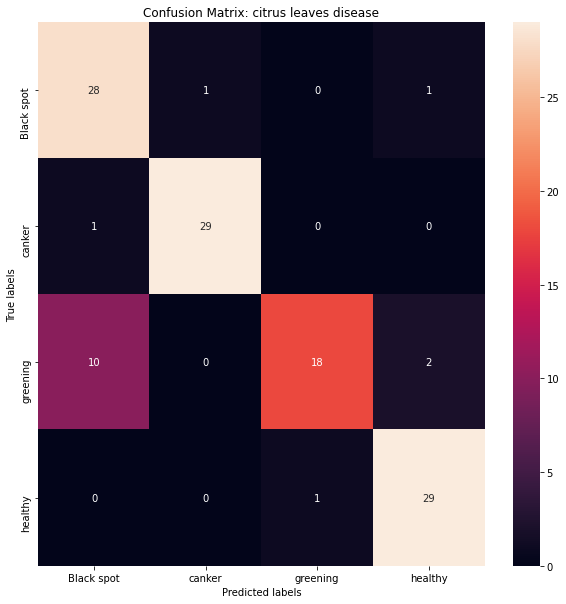

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
prediksi = kf2.predict(x_test.astype('float32'))
pred = np.argmax(prediksi, axis = 1)
target_names = KATEGORI
cm = confusion_matrix(y_test, pred)
print('Classificat  ion Report')
print(classification_report(y_test, pred, target_names= target_names))
print('==========================================================')
print('Confussion Matrix')
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot('111')
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: citrus leaves disease'); 
ax.xaxis.set_ticklabels(list(target_names)); ax.yaxis.set_ticklabels(list(target_names));

#Test Kfold with augmentation model 2

In [ ]:
test_fold1 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_model/Model 2/5')
test_fold1.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_151 (Conv2D)          (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_150 (MaxPoolin (None, 63, 63, 16)        0         
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 61, 61, 32)        4640      
_________________________________________________________________
max_pooling2d_151 (MaxPoolin (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_152 (MaxPoolin (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 12, 12, 64)      

Classification Report
              precision    recall  f1-score   support

  Black spot       0.96      0.83      0.89        30
      canker       0.97      1.00      0.98        30
    greening       0.88      0.93      0.90        30
     healthy       0.94      0.97      0.95        30

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120

Confussion Matrix
[[25  0  3  2]
 [ 0 30  0  0]
 [ 1  1 28  0]
 [ 0  0  1 29]]


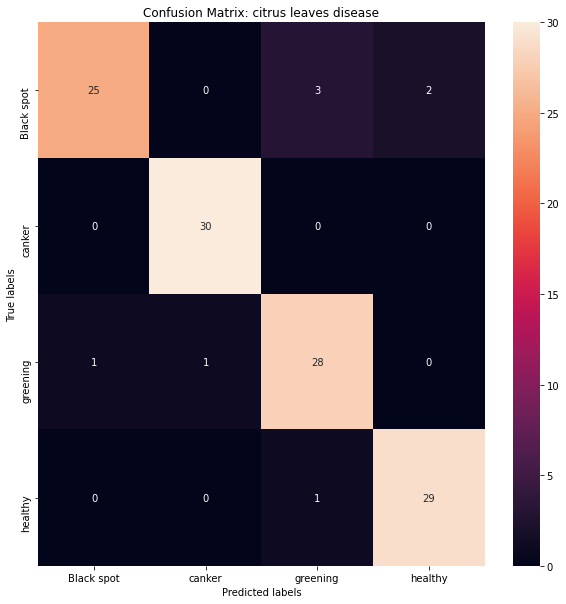

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
prediksi = test_fold1.predict(x_test.astype('float32'))
pred = np.argmax(prediksi, axis = 1)
target_names = KATEGORI
cm = confusion_matrix(y_test, pred)
print('Classification Report')
print(classification_report(y_test, pred, target_names= target_names))
print('==========================================================')
print('Confussion Matrix')
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot('111')
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: citrus leaves disease'); 
ax.xaxis.set_ticklabels(list(target_names)); ax.yaxis.set_ticklabels(list(target_names));

#KFOLD without augmented model 2


In [ ]:
num_fold = 5
kfold = StratifiedKFold(n_splits= num_fold, shuffle=True, random_state=1)
acc_per_fold = []
loss_per_fold =[]
fold_no = 1

for train, test in kfold.split(inputs, targets):
    kf2_noaug= tf.keras.models.Sequential()
    kf2_noaug.add(Conv2D(16, kernel_size=(3,3),  input_shape= x.shape[1:], activation ='relu'))
    kf2_noaug.add(MaxPooling2D(2,2))

    kf2_noaug.add(Conv2D(32, kernel_size=(3,3),  activation ='relu'))
    kf2_noaug.add(MaxPooling2D(2,2))

    kf2_noaug.add(Conv2D(64, kernel_size=(3,3),  activation ='relu'))
    kf2_noaug.add(MaxPooling2D(2,2))

    kf2_noaug.add(Conv2D(64, kernel_size=(3,3),  activation ='relu'))
    kf2_noaug.add(MaxPooling2D(2,2))

    kf2_noaug.add(Flatten())
    kf2_noaug.add(Dense(512, activation='relu'))
    kf2_noaug.add(Dense(4, activation='softmax'))
    kf2_noaug.compile(loss=loss_function,
              optimizer=optimizer,
              metrics=['accuracy'])
    
     #Generate Print
    print('------------------------------------------------------')
    print(f'Training for fold{fold_no}.....')
    checkpoint_path = f'/content/drive/MyDrive/Colab Notebooks/save_model/Model 2 without augmented/{fold_no}'
    os.mkdir(checkpoint_path)
    callbacks = [
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
    ]
    
    #fit Model
    history = kf2_noaug.fit(inputs[train], targets[train],
                    batch_size=32,
                    epochs=200,
                    verbose=1,
                    validation_data = (inputs[test], targets[test]),
                    callbacks = callbacks
                    )
    
    #Generate metrics
    scores = kf2_noaug.evaluate(inputs[test], targets[test], verbose=0)
    print(f'Score Evaluasi Fold Ke - {fold_no} : {kf2_noaug.metrics_names[0]}; {kf2_noaug.metrics_names[1]} of {scores[1]*100}%')
    acc_per_fold.append(scores[1] * 100)
    loss_per_fold.append(scores[0])

    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1,2,figsize=(30,3))

    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('CNN Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    # ax[0].set_ylim(bottom=.1)
    # ax[0].set_ylim(top=1.5)
    ax[0].legend(['train', 'val'], loc='lower right')

    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('CNN loss')
    ax[1].set_ylabel('loss')
    ax[1].set_xlabel('Epoch')
    #ax[1].set_ylim(bottom=.1)
    #ax[1].set_ylim(top=1.5)
    ax[1].legend(['train', 'val'], loc='lower right')
    plt.show()
    
    #incare fold
    fold_no = fold_no +1
    

In [ ]:
# == Provide average scores ==
print('========================================================================')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
prediksi = kf2_noaug.predict(x_test.astype('float32'))
pred = np.argmax(prediksi, axis = 1)
target_names = KATEGORI
cm = confusion_matrix(y_test, pred)
print('Classificat  ion Report')
print(classification_report(y_test, pred, target_names= target_names))
print('==========================================================')
print('Confussion Matrix')
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot('111')
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: citrus leaves disease'); 
ax.xaxis.set_ticklabels(list(target_names)); ax.yaxis.set_ticklabels(list(target_names));

#Test Kfold without augmentation model 2

In [ ]:
test_fold1 = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/save_model/Model 2 without augmented/1')
test_fold1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 63, 63, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 128)               0

Classification Report
              precision    recall  f1-score   support

  Black spot       0.69      0.83      0.76        30
      canker       0.78      0.93      0.85        30
    greening       0.75      0.50      0.60        30
     healthy       0.96      0.90      0.93        30

    accuracy                           0.79       120
   macro avg       0.80      0.79      0.78       120
weighted avg       0.80      0.79      0.78       120

Confussion Matrix
[[25  2  2  1]
 [ 0 28  2  0]
 [11  4 15  0]
 [ 0  2  1 27]]


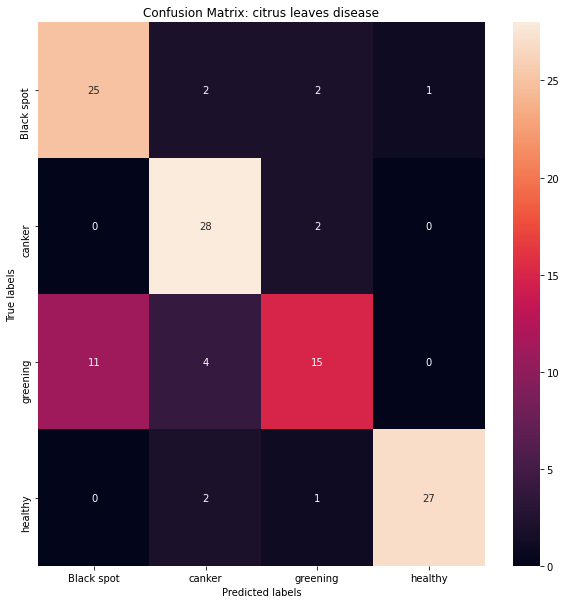

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix
prediksi = test_fold1.predict(x_test.astype('float32'))
pred = np.argmax(prediksi, axis = 1)
target_names = KATEGORI
cm = confusion_matrix(y_test, pred)
print('Classification Report')
print(classification_report(y_test, pred, target_names= target_names))
print('==========================================================')
print('Confussion Matrix')
print(cm)

plt.figure(figsize=(10,10))
ax= plt.subplot('111')
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix: citrus leaves disease'); 
ax.xaxis.set_ticklabels(list(target_names)); ax.yaxis.set_ticklabels(list(target_names));